In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from sklearn import manifold,datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
x1,y1=make_blobs(n_samples=50,centers=[[4,4],[-2,-1],[1,1],[10,4]],cluster_std=0.9)


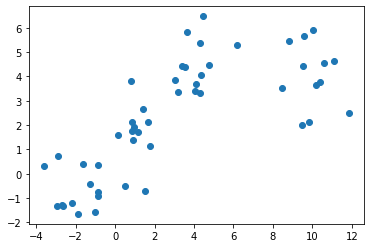

In [3]:
plt.scatter(x1[:,0],x1[:,1],marker="o")

In [4]:
model=AgglomerativeClustering(n_clusters=4,linkage="complete")

In [5]:
model.fit(x1,y1)

AgglomerativeClustering(linkage='complete', n_clusters=4)

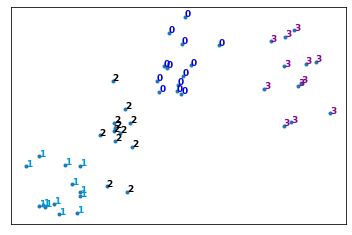

In [6]:
plt.figure(figsize=(6,4))
x_min,x_max=np.min(x1,axis=0),np.max(x1,axis=0)
x1=(x1-x_min)/(x_max-x_min)
for i in range(x1.shape[0]):
    plt.text(x1[i,0],x1[i,1],str(y1[i]),
             color=plt.cm.nipy_spectral(model.labels_[i]/10.),
             fontdict={"weight":"bold","size":9})
plt.xticks([])
plt.yticks([])

plt.scatter(x1[:,0],x1[:,1],marker=".")
plt.show()

In [7]:
dist_matrix=distance_matrix(x1,x1)
len(dist_matrix)

50

In [8]:
Z=hierarchy.linkage(dist_matrix,"centroid")

<ipython-input-8-c5063cd5d3b4>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z=hierarchy.linkage(dist_matrix,"centroid")


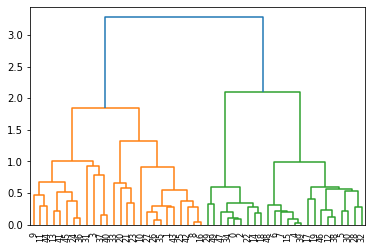

In [9]:
dendro=hierarchy.dendrogram(Z)

In [10]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2020-07-13 12:54:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2020-07-13 12:54:45 (93.9 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [11]:
data=pd.read_csv("cars_clus.csv")

In [12]:
np.unique((data[["type"]]))

array(['$null$', '0.000', '1.000'], dtype=object)

In [13]:
data.size

2544

In [14]:
data[["sales","resale","type","price","engine_s","horsepow","wheelbas","width","length","curb_wgt","fuel_cap","mpg","lnsales"]]=data[["sales","resale","type","price","engine_s","horsepow","wheelbas","width","length","curb_wgt","fuel_cap","mpg","lnsales"]].apply(pd.to_numeric,errors="coerce")

In [15]:
data=data.dropna()

In [16]:
data.reset_index(drop=True)
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
5,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [17]:
featureset = data[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

In [18]:
from sklearn.preprocessing import MinMaxScaler
x=featureset.values

In [19]:
min_max_scaler=MinMaxScaler()
feature_mtx=min_max_scaler.fit_transform(x)
feature_mtx[:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

In [20]:
import scipy

In [21]:
length=feature_mtx.shape[0]
D=np.zeros([length,length])
for i in range(length):
    for j in range(length):
        D[i,j]=scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

In [51]:
D.shape

(117, 117)

In [53]:
import pylab
import scipy.cluster.hierarchy

In [69]:
Z=hierarchy.linkage(D,"complete")
Z.shape

<ipython-input-69-8a1410ad834c>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z=hierarchy.linkage(D,"complete")


(116, 4)

In [55]:
from scipy.cluster.hierarchy import fcluster
max_d=5
clusters=fcluster(Z,max_d,criterion="maxclust")
clusters

array([2, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 2,
       5, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 3, 4, 2, 4, 4, 4, 3, 4, 3,
       1, 4, 1, 2, 4, 4, 4, 3, 2, 2, 4, 4, 2, 4, 4, 4, 4, 3, 3, 3, 2, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 4, 4, 4, 3,
       4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 1, 2, 4, 4, 2, 2], dtype=int32)

In [56]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data['manufact'][id],data['model'][id], int(float(data['type'][id])) )
    
dendro = hierarchy.dendrogram(Z,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

KeyError: 33

<Figure size 1296x3600 with 0 Axes>

In [57]:
dist_matrix=distance_matrix(feature_mtx,feature_mtx)

In [58]:
dist_matrix

array([[0.        , 0.57777143, 0.75455727, ..., 0.28530295, 0.24917241,
        0.18879995],
       [0.57777143, 0.        , 0.22798938, ..., 0.36087756, 0.66346677,
        0.62201282],
       [0.75455727, 0.22798938, 0.        , ..., 0.51727787, 0.81786095,
        0.77930119],
       ...,
       [0.28530295, 0.36087756, 0.51727787, ..., 0.        , 0.41797928,
        0.35720492],
       [0.24917241, 0.66346677, 0.81786095, ..., 0.41797928, 0.        ,
        0.15212198],
       [0.18879995, 0.62201282, 0.77930119, ..., 0.35720492, 0.15212198,
        0.        ]])

In [59]:
model=AgglomerativeClustering(n_clusters=4,linkage="complete")
model.fit(feature_mtx)
model.labels_

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 3, 3, 3, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       3, 1, 3, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 3, 0, 0, 0, 0, 0])

In [60]:
data["cluster"]=model.labels_

In [61]:
data.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,1
3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,1
4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
5,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,1


In [62]:
import matplotlib.cm as cm

In [63]:
n_clusters=max(model.labels_)+1

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

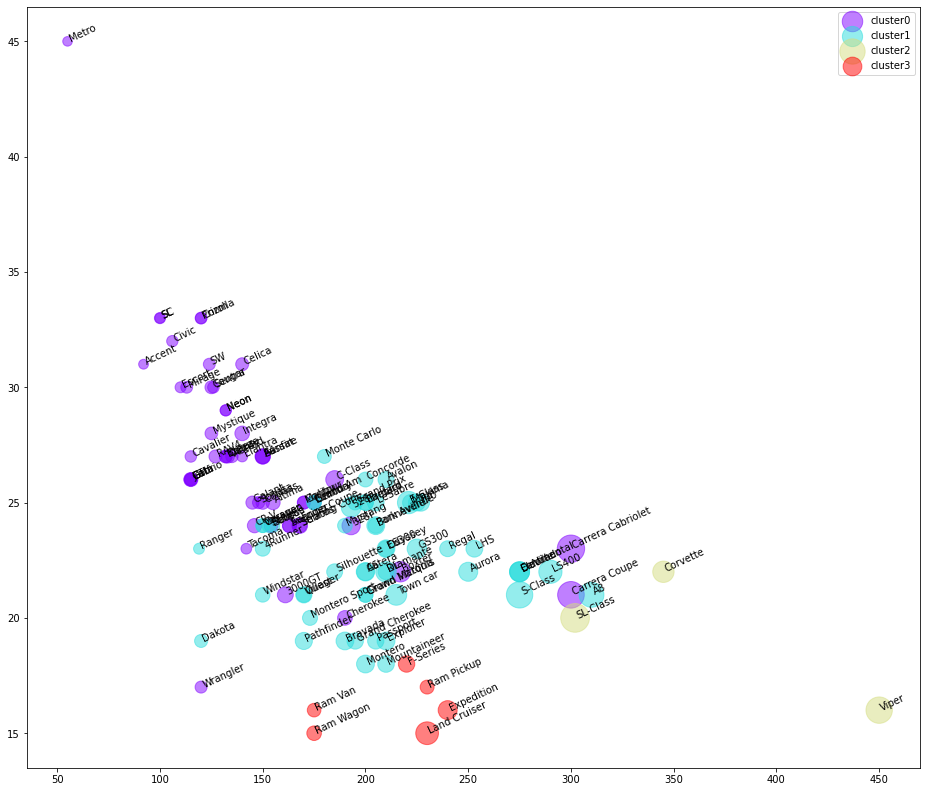

In [64]:
colors=cm.rainbow(np.linspace(0,1,n_clusters))
cluster_labels=list(range(0,n_clusters))
plt.figure(figsize=(16,14))
for color,label in zip(colors,cluster_labels):
    subset=data[data.cluster==label]
    for i in subset.index:
        plt.text(subset.horsepow[i],subset.mpg[i],str(subset["model"][i]),rotation=25)
    plt.scatter(subset.horsepow,subset.mpg,s=subset.price*10,c=color,label="cluster"+str(label),alpha=0.50)
plt.legend()


In [65]:
data.groupby(["cluster","type"])["cluster"].count()

cluster  type
0        0.0     48
         1.0      5
1        0.0     37
         1.0     18
2        0.0      3
3        1.0      6
Name: cluster, dtype: int64

In [66]:
agg_cars = data.groupby(['cluster','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

<ipython-input-66-521a4da5ec8b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  agg_cars = data.groupby(['cluster','type'])['horsepow','engine_s','mpg','price'].mean()


horsepow  engine_s        mpg      price
cluster type                                            
0       0.0   144.625000  2.220833  27.395833  20.075479
        1.0   145.000000  2.580000  22.200000  17.009200
1       0.0   217.540541  3.602703  23.481081  31.837027
        1.0   173.722222  3.238889  20.666667  24.422944
2       0.0   365.666667  6.233333  19.333333  66.010000
3       1.0   211.666667  4.483333  16.166667  29.024667

In [70]:
a=[2,3,10]
b=[5,7,12]

In [73]:
print(scipy.spatial.distance.euclidean(a,b))

5.0
